<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 145.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 180.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 139.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 164.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 98.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 158.8 MB/s eta 0:00:00


#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [4]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [11]:
## Write your code here
print(df.dtypes[['Employment','JobSat', 'RemoteWork']])
print(df[['Employment', 'JobSat', 'RemoteWork']].isnull().sum())

#To check there impact to weather fill or  drop : 
missing_percent = df[['Employment', 'JobSat', 'RemoteWork']].isnull().mean() * 100 
print(missing_percent) 

#Employment is Categorical 
df['Employment'].fillna(df['Employment'].mode()[0], inplace = True)

#JobSat is Categorical/ Subjective
if df['JobSat'].isnull().mean() < 0.1:
    df['JobSat'].fillna(df['JobSat'].mode()[0], inplace = True) 
else:
    df.dropna(subset =['JobSat'], inplace = True) 

df['RemoteWork'].fillna(df['RemoteWork'].mode()[0], inplace =True) 

#Verify Cleaning 
print(df[['Employment', 'JobSat', 'RemoteWork']].isnull().sum())


Employment     object
JobSat        float64
RemoteWork     object
dtype: object
Employment    0
JobSat        0
RemoteWork    0
dtype: int64
Employment    0.0
JobSat        0.0
RemoteWork    0.0
dtype: float64
Employment    0
JobSat        0
RemoteWork    0
dtype: int64


/tmp/ipykernel_299/3011478730.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['JobSat'].fillna(df['JobSat'].mode()[0], inplace = True)


#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


YearsCodePro    float64
JobSat          float64
dtype: object
  ExperienceRange  JobSat
0             0-5     7.0
1            5-10     7.0
2           10-20     7.0
3             >20     8.0


/tmp/ipykernel_299/3728430683.py:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_satisfaction = df_clean.groupby('ExperienceRange')['JobSat'].median().reset_index()
/tmp/ipykernel_299/3728430683.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data =median_satisfaction, x = 'ExperienceRange', y ='JobSat', palette ='viridis')


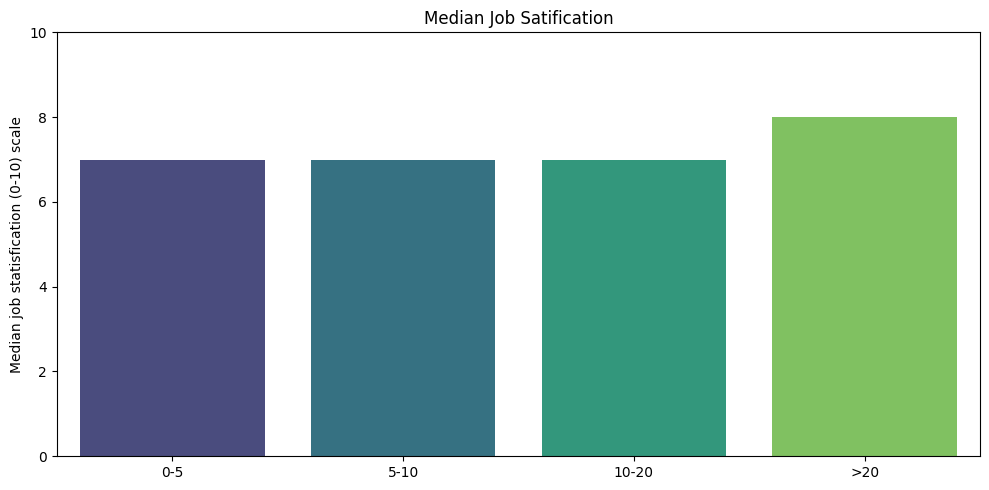

In [34]:
## Write your code here

print(df.dtypes[['YearsCodePro', 'JobSat']])
# print(df['YearsCodePro'].unique())


# Drop missing values in YearsCodePro and JobSat
df_clean = df[['YearsCodePro', 'JobSat']].dropna()

# Convert YearsCodePro special text values to numbers
df_clean['YearsCodePro'] = df_clean['YearsCodePro'].replace({
    'Less than 1 year': 0.5,
    'More than 50 years': 51
})
df_clean['YearsCodePro'] = pd.to_numeric(df_clean['YearsCodePro'], errors='coerce')

# Create experience bins
bins = [0, 5, 10, 20, 100]
labels = ['0-5', '5-10', '10-20', '>20']
df_clean['ExperienceRange'] = pd.cut(df_clean['YearsCodePro'], bins=bins, labels=labels, right=False)

# Calculate median JobSat per range
median_satisfaction = df_clean.groupby('ExperienceRange')['JobSat'].median().reset_index()
print(median_satisfaction)

plt.figure(figsize=(10,5))
sns.barplot(data =median_satisfaction, x = 'ExperienceRange', y ='JobSat', palette ='viridis')
plt.title('Median Job Satification')
plt.xlabel('')
plt.ylabel('Median job statisfication (0-10) scale')
plt.ylim(0,10) 
plt.tight_layout() 
plt.show()



#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


/tmp/ipykernel_301/1418255099.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='JobSat', order= df['JobSat'].value_counts().index, palette ='viridis')


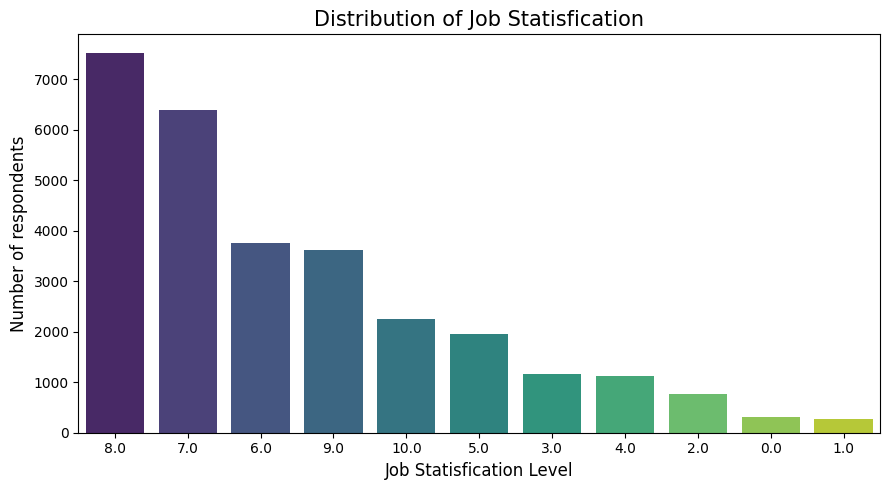

In [6]:
## Write your code here
plt.figure(figsize = (9,5))
sns.countplot(data=df, x='JobSat', order= df['JobSat'].value_counts().index, palette ='viridis') 
plt.title("Distribution of Job Statisfication", fontsize =15)
plt.xlabel("Job Statisfication Level", fontsize =12)
plt.ylabel("Number of respondents",fontsize = 12) 
plt.tight_layout()
plt.show()

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


/tmp/ipykernel_301/2102363538.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df, x ='RemoteWork', palette ='mako')


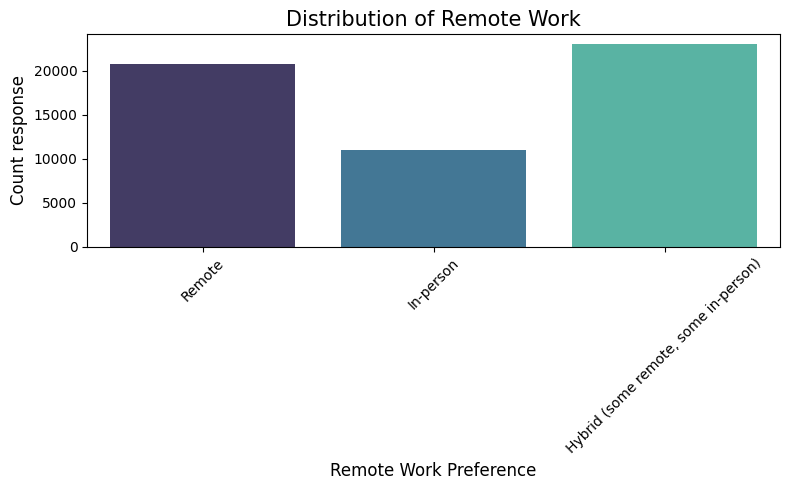

RemoteWork                                                               Hybrid (some remote, some in-person)  \
DevType              Employment                                                                                 
Academic researcher  Employed, full-time                                                                  324   
                     Employed, full-time;Employed, part-time                                                1   
                     Employed, full-time;Independent contractor, fre...                                    16   
                     Employed, full-time;Independent contractor, fre...                                     1   
                     Employed, full-time;Independent contractor, fre...                                     1   
...                                                                                                       ...   
System administrator Student, full-time;Not employed, but looking fo...                         

In [14]:
## Write your code here
plt.figure(figsize = (8,5))
sns.countplot(data = df, x ='RemoteWork', palette ='mako') 
plt.title('Distribution of Remote Work', fontsize =15) 
plt.xlabel('Remote Work Preference',fontsize = 12) 
plt.ylabel('Count response', fontsize = 12) 
plt.xticks(rotation =45)
plt.tight_layout() 
plt.show()

remote_work_crosstab = pd.crosstab([df['DevType'], df['Employment']], df['RemoteWork'])
print(remote_work_crosstab)

#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


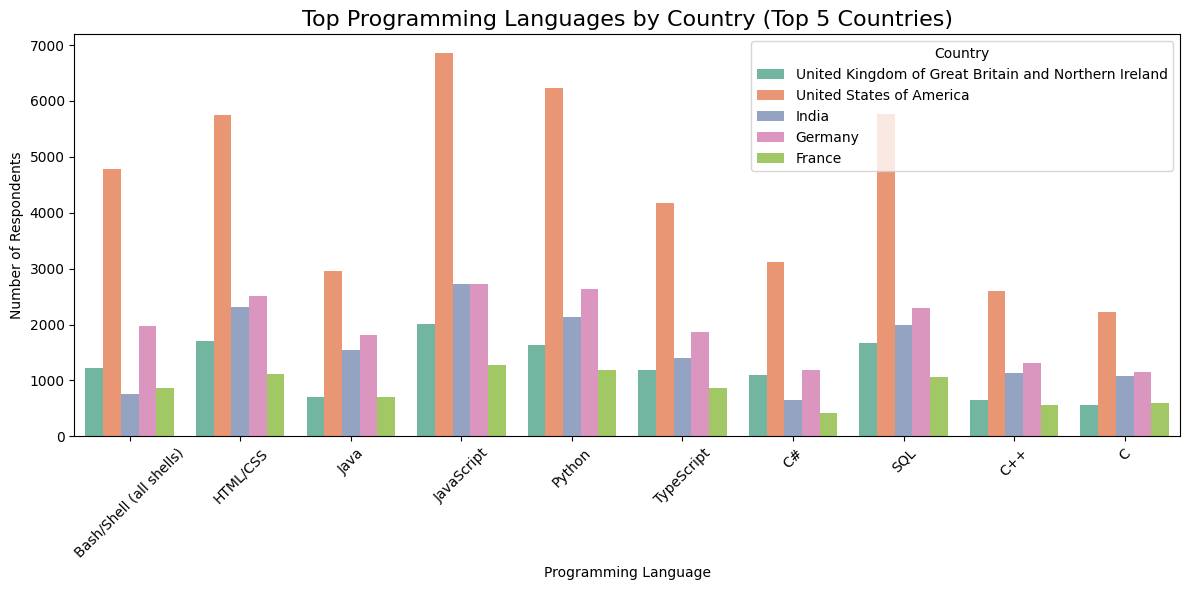

In [32]:
## Write your code here
df_lang = df[['Country', 'LanguageHaveWorkedWith']].dropna()
#split the language and explode 
df_lang['LanguageHaveWorkedWith'] = df['LanguageHaveWorkedWith'].str.split(';') 
df_lang = df_lang.explode('LanguageHaveWorkedWith')
df_lang['LanguageHaveWorkedWith'] = df_lang['LanguageHaveWorkedWith'].str.strip()

top_countries = df_lang['Country'].value_counts().nlargest(5).index
df_top = df_lang[df_lang['Country'].isin(top_countries)]

top_langs = df_top['LanguageHaveWorkedWith'].value_counts().nlargest(10).index
df_top = df_top[df_top['LanguageHaveWorkedWith'].isin(top_langs)]

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.countplot(data=df_top, x='LanguageHaveWorkedWith', hue='Country', palette='Set2')

plt.title('Top Programming Languages by Country (Top 5 Countries)', fontsize=16)
plt.xlabel('Programming Language')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.legend(title='Country')
plt.tight_layout()
plt.show()



#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


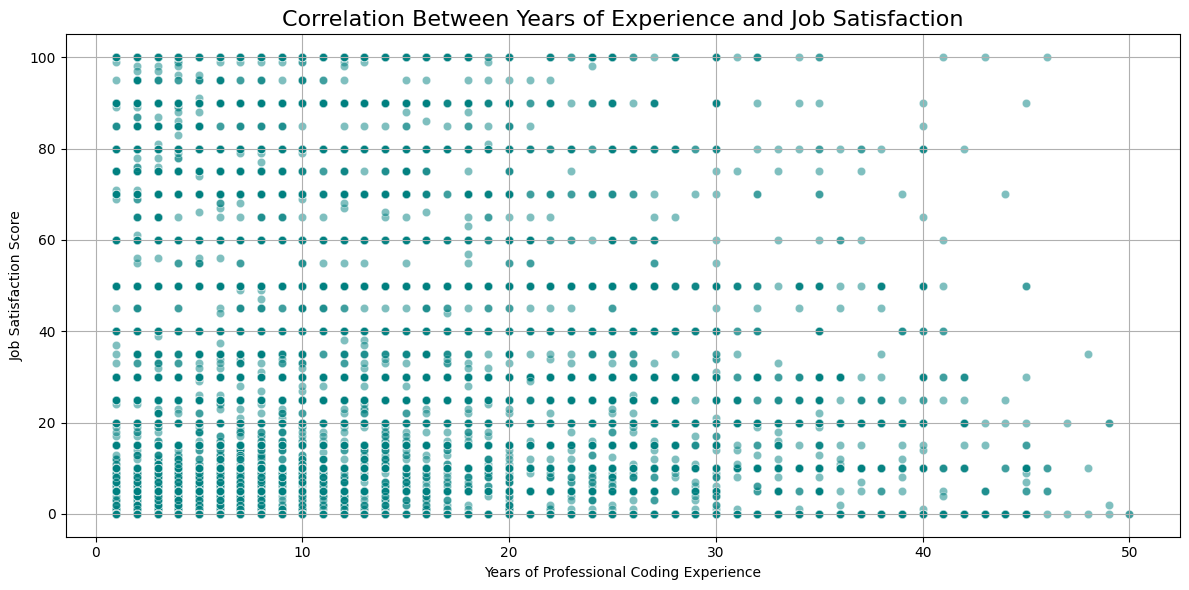

In [33]:
## Write your code here
#Remove missing values
df_plot = df[['YearsCodePro', 'JobSatPoints_1']].copy() 
df_plot = df_plot.dropna() 

#COnvert yearsCodepro to numeric if its not 
df_plot['YearsCodePro'] = pd.to_numeric(df_plot['YearsCodePro'], errors ='coerce')
df_plot = df_plot.dropna() 

plt.figure(figsize = (12,6))
sns.scatterplot(data =df_plot, x='YearsCodePro', y='JobSatPoints_1', alpha = 0.5, color ='teal') 
plt.title('Correlation Between Years of Experience and Job Satisfaction', fontsize=16) 
plt.xlabel('Years of Professional Coding Experience') 
plt.ylabel('Job Satisfaction Score') 
plt.grid() 
plt.tight_layout() 
plt.show()

#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


Employment                                          Employed, full-time  \
EdLevel                                                                   
Associate degree (A.A., A.S., etc.)                                1059   
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                      16806   
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                   11011   
Primary/elementary school                                           160   
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                     2073   
Secondary school (e.g. American high school, Ge...                 1460   
Some college/university study without earning a...                 3579   
Something else                                                      377   

Employment                                          Employed, full-time;Employed, part-time  \
EdLevel                                                                                       
Associate degree (A.A., A.S., etc.)                        

/tmp/ipykernel_301/1356417399.py:21: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


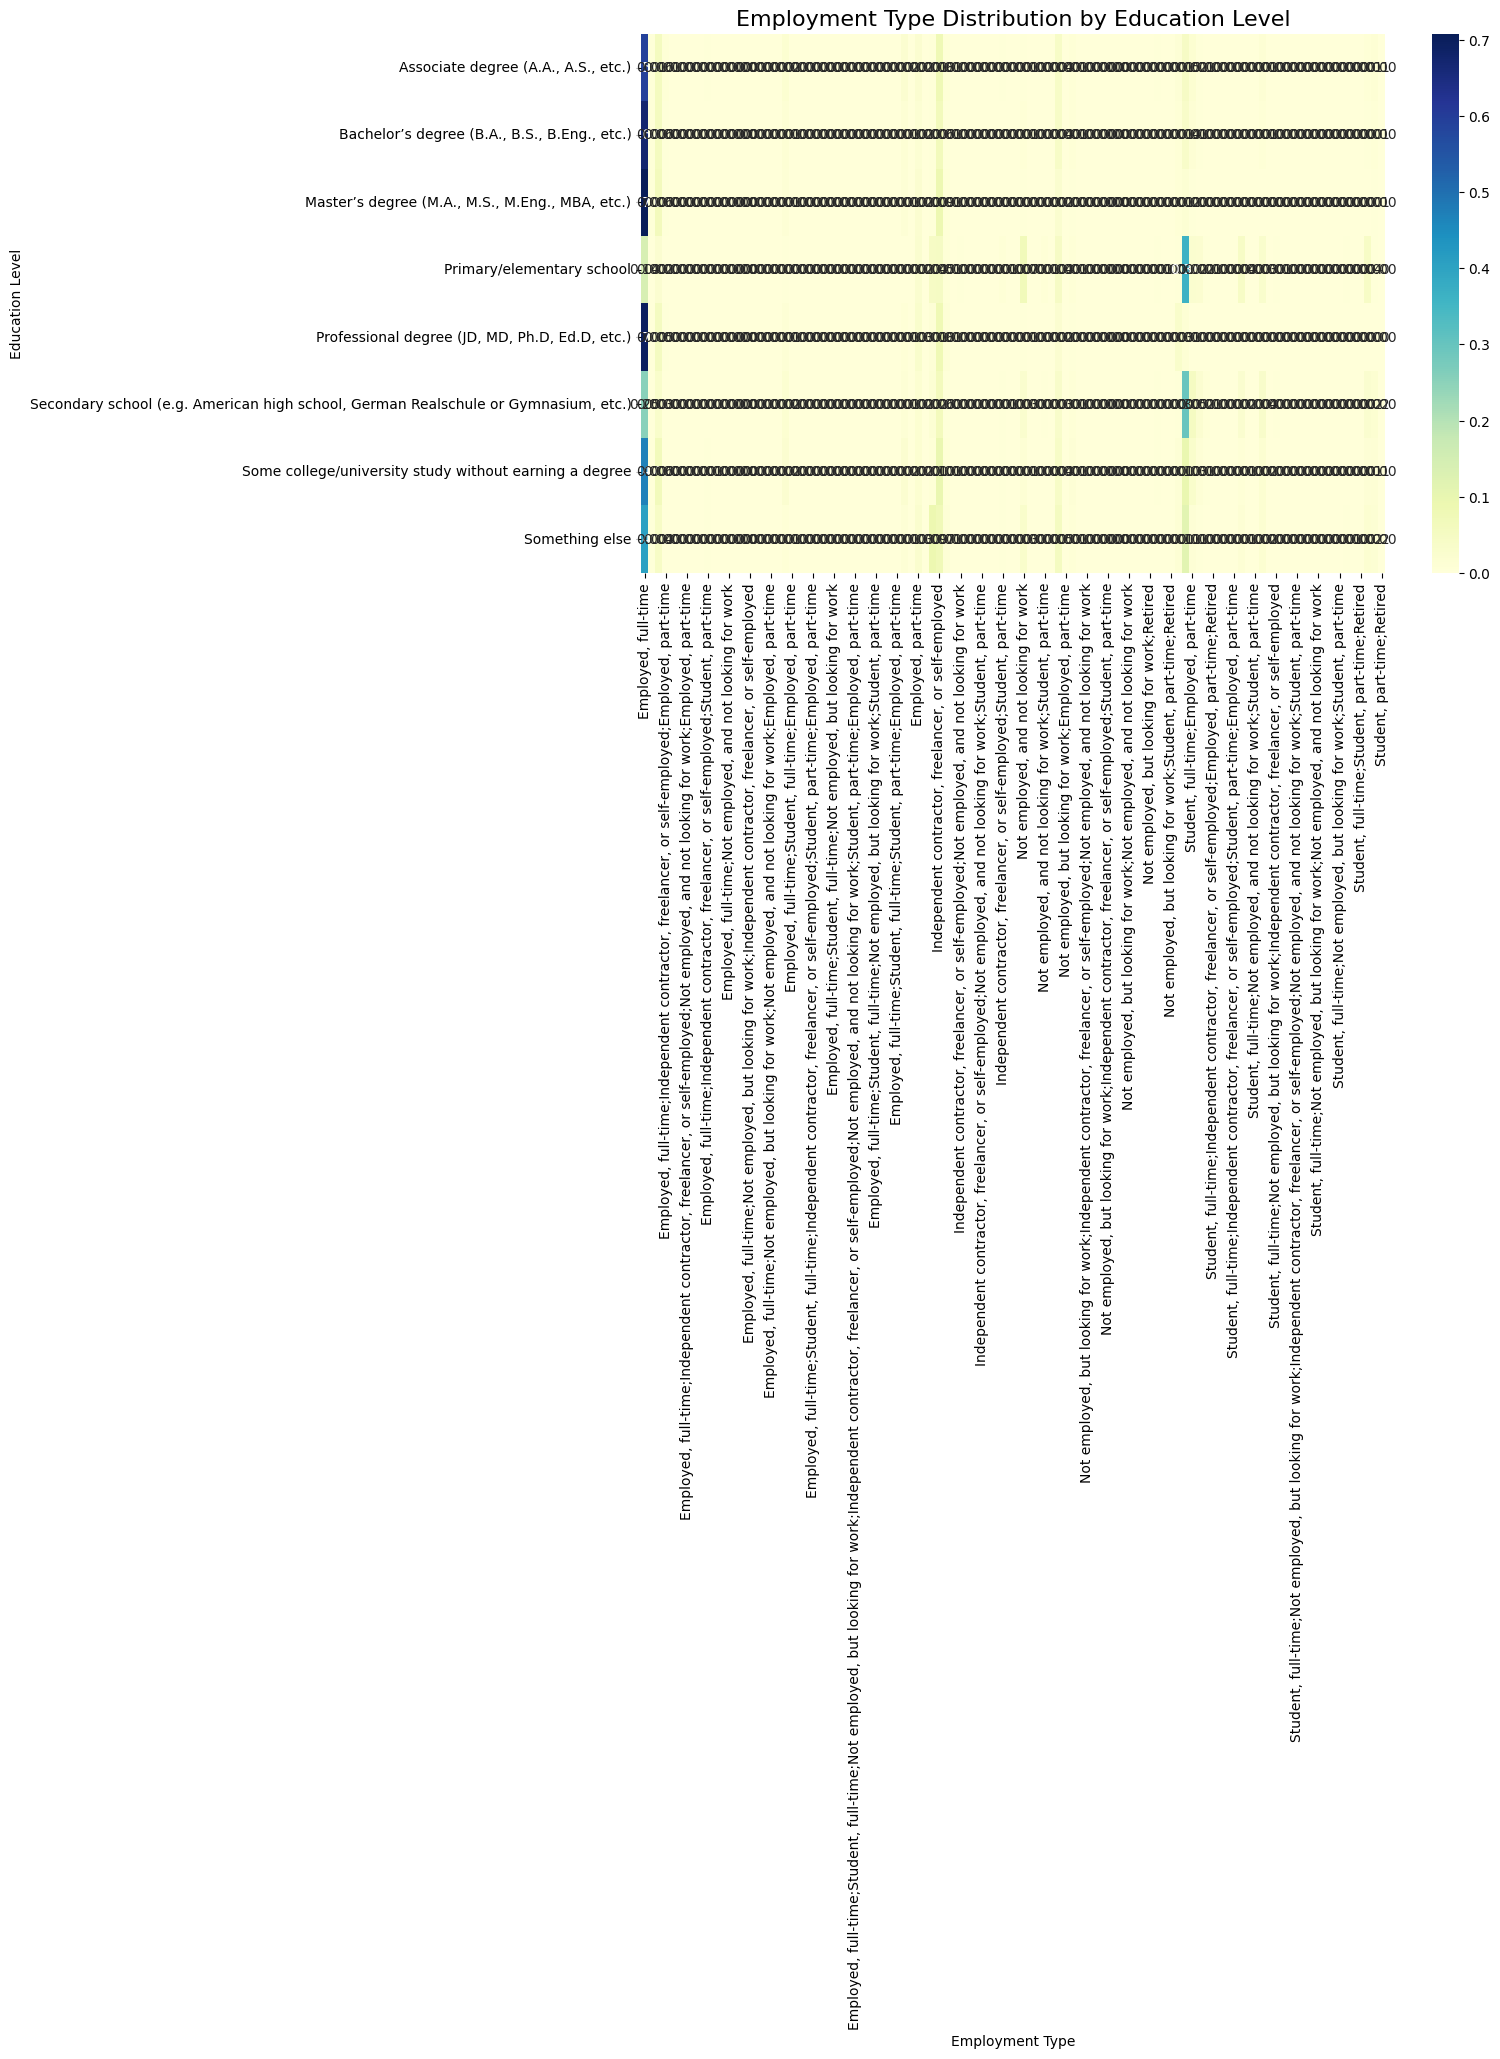

In [44]:
## Write your code here

# Create a cross-tabulation
edu_emp_crosstab = pd.crosstab(df['EdLevel'], df['Employment'])

# Display the table
print(edu_emp_crosstab)



import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))
sns.heatmap(edu_emp_crosstab, cmap='YlGnBu', annot=True, fmt='.2f')

plt.title('Employment Type Distribution by Education Level', fontsize=16)
plt.xlabel('Employment Type')
plt.ylabel('Education Level')
plt.tight_layout()
plt.show()



#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [45]:
## Write your code here

edu_emp_crosstab.to_csv('Top5_EdLevel_vs_Employment.csv', index=True)


<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
